In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(style="darkgrid")

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
filusdt = pd.read_csv('FILUSDT.csv')
dotusdt = pd.read_csv('DOTUSDT.csv')

In [3]:
def change(df, name):
    df['Opened'] = pd.to_datetime(df['Opened'].astype(str))
    df.drop(['Open', 'High', 'Low'], axis=1, inplace=True)
    df.set_index('Opened', inplace=True)
    df.columns = [name+'_cl', name + '_vol']
    return df

In [4]:
fil = change(filusdt, 'FIL')
dot = change(dotusdt, 'DOT')

data = pd.concat([fil, dot], axis=1)[-1000:]

In [5]:
data

,FIL_cl,FIL_vol,DOT_cl,DOT_vol
Opened,,,,
2021-10-17 07:25:00,66.586,4025.3,42.771,58040.7
2021-10-17 07:30:00,66.380,4349.3,42.627,84613.9
2021-10-17 07:35:00,66.294,7527.7,42.578,47158.9
2021-10-17 07:40:00,66.293,13031.9,42.642,18403.6
2021-10-17 07:45:00,66.361,6776.8,42.639,41769.6
...,...,...,...,...
2021-10-20 18:20:00,67.251,12763.3,44.498,70514.7
2021-10-20 18:25:00,67.284,7153.2,44.586,67542.9
2021-10-20 18:30:00,67.429,13359.9,44.642,109409.9


In [6]:
data.isnull().sum()

FIL_cl     0
FIL_vol    0
DOT_cl     0
DOT_vol    0
dtype: int64

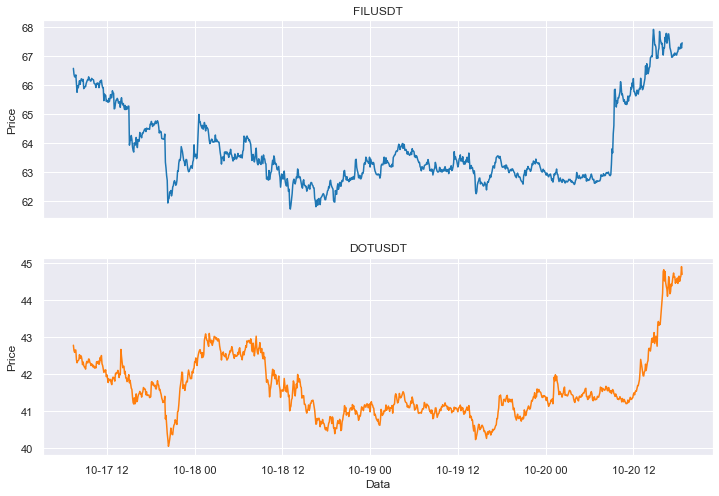

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(data.index, data['FIL_cl'], 'tab:blue')
axs[0].set_title('FILUSDT')
axs[1].plot(data.index, data['DOT_cl'], 'tab:orange')
axs[1].set_title('DOTUSDT')

for ax in axs.flat:
    ax.set(xlabel='Data', ylabel='Price')

for ax in axs.flat:
    ax.label_outer()

In [8]:
data_cl = data[['FIL_cl', 'DOT_cl']]
data_cl_pct = data_cl.pct_change()*100
data_cl_pct.dropna(inplace=True, axis=0)

In [9]:
data_cl_pct.describe()

,FIL_cl,DOT_cl
count,999.000000,999.000000
mean,0.001622,0.004757
std,0.247532,0.274987
min,-2.057197,-1.478547
25%,-0.119132,-0.158596
50%,-0.008902,-0.002417
75%,0.115565,0.158716
max,1.911380,1.619935


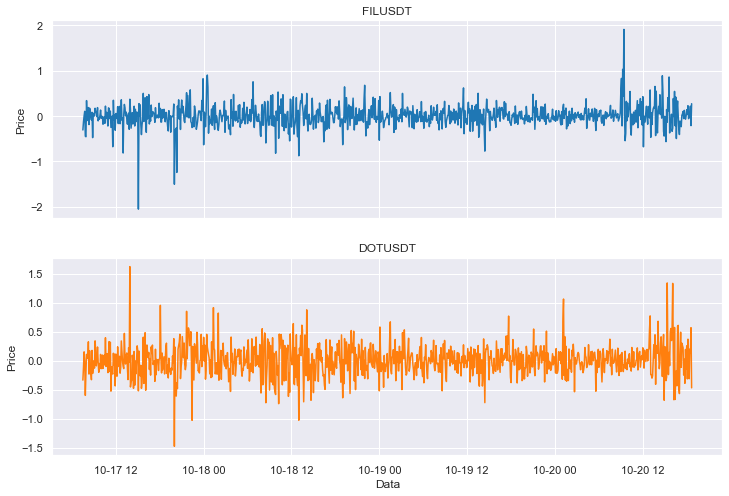

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(data_cl_pct.index, data_cl_pct['FIL_cl'], 'tab:blue')
axs[0].set_title('FILUSDT')
axs[1].plot(data_cl_pct.index, data_cl_pct['DOT_cl'], 'tab:orange')
axs[1].set_title('DOTUSDT')

for ax in axs.flat:
    ax.set(xlabel='Data', ylabel='Price')

for ax in axs.flat:
    ax.label_outer()

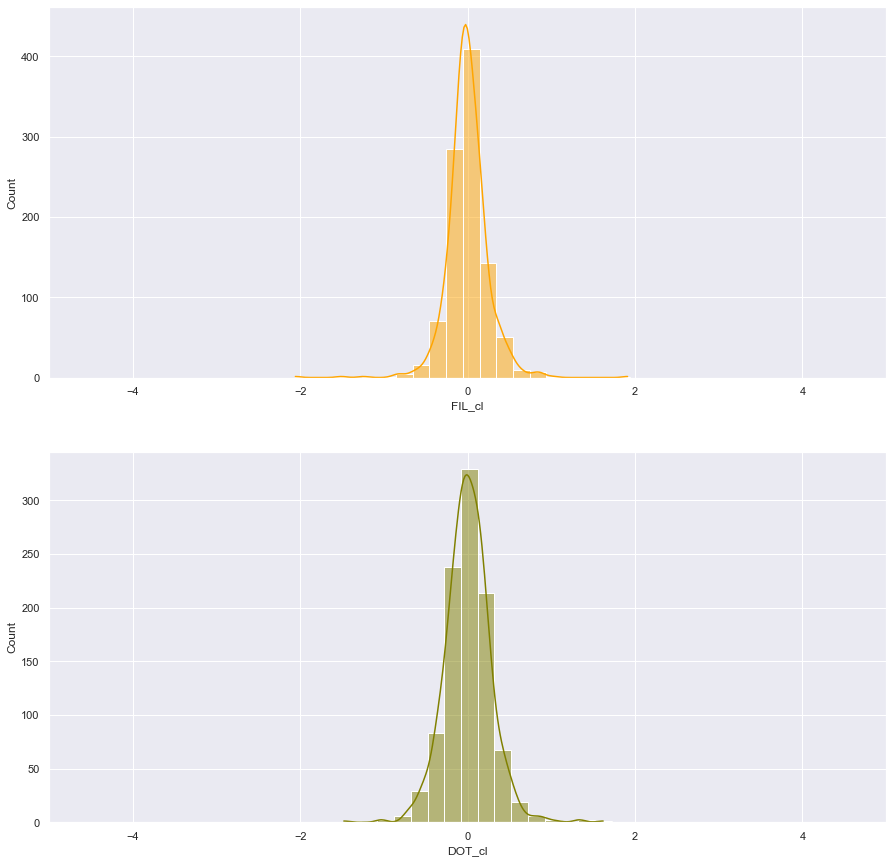

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

sns.histplot(data=data_cl_pct['FIL_cl'], kde=True, color="orange", ax=axs[0], binwidth=0.2)
axs[0].set_xlim(-5, 5)
sns.histplot(data=data_cl_pct['DOT_cl'], kde=True, color="olive", ax=axs[1], binwidth=0.2)
axs[1].set_xlim(-5, 5)

plt.show()

In [12]:
def trend_tresholds(x):
    if x > -0.4 and x <= 0.4:
        return 'o'
    elif x > 0.4 and x <= 1.1:
        return '+'
    elif x > -1.1 and x <= -0.4:
        return '-'
    elif x > 1.1 and x <= 1.6:
        return '++'
    elif x > -1.6 and x <= -1.1:
        return '--'
    elif x > 1.6 and x <= 2.3:
        return '+++'
    elif x > -2.3 and x <= -1.6:
        return '---'
    elif x > 2.3:
        return '++++'
    elif x <= -2.3:
        return '----'
    
for ticker in data_cl_pct.columns:
    data_cl_pct["Trend_" + str(ticker)] = np.zeros(data_cl_pct[ticker].count())
    data_cl_pct["Trend_"+ str(ticker)] = data_cl_pct[ticker].apply(lambda x: trend_tresholds(x))

In [13]:
data_cl_pct

,FIL_cl,DOT_cl,Trend_FIL_cl,Trend_DOT_cl
Opened,,,,
2021-10-17 07:30:00,-0.309374,-0.336677,o,o
2021-10-17 07:35:00,-0.129557,-0.114951,o,o
2021-10-17 07:40:00,-0.001508,0.150312,o,o
2021-10-17 07:45:00,0.102575,-0.007035,o,o
2021-10-17 07:50:00,-0.447552,-0.600389,-,-
...,...,...,...,...
2021-10-20 18:20:00,-0.034189,-0.313634,o,o
2021-10-20 18:25:00,0.049070,0.197762,o,o
2021-10-20 18:30:00,0.215504,0.125600,o,o


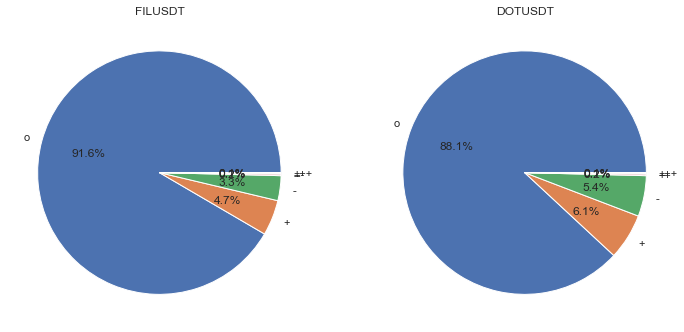

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10))
axs[0].pie(data_cl_pct['Trend_FIL_cl'].value_counts(), labels=data_cl_pct['Trend_FIL_cl'].value_counts().index, autopct="%.1f%%")
axs[0].set_title('FILUSDT')
axs[1].pie(data_cl_pct['Trend_DOT_cl'].value_counts(), labels=data_cl_pct['Trend_DOT_cl'].value_counts().index, autopct="%.1f%%")
axs[1].set_title('DOTUSDT')

fig.show()

### Ежедневная доходность и объемы

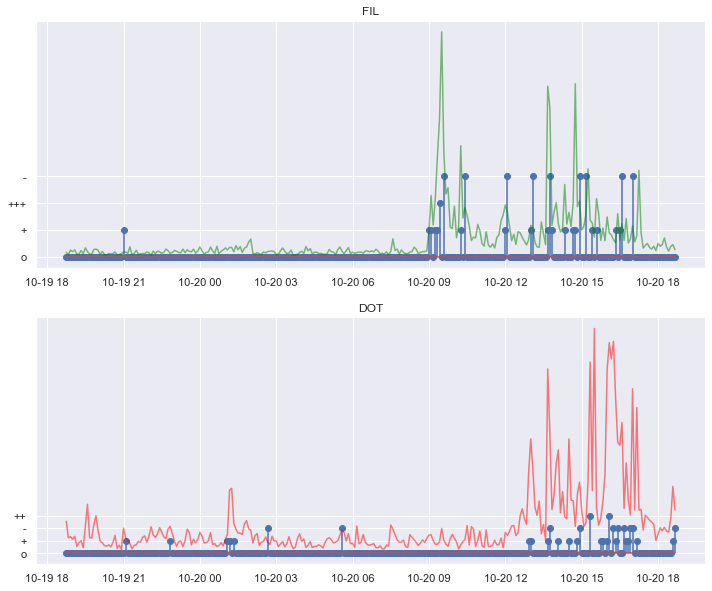

In [16]:
t = 12 * 24   # последние 24h
fig, axs = plt.subplots(2, 1, figsize=(12,10))

axs[0].stem(data_cl_pct.index[-t:], data_cl_pct['Trend_FIL_cl'][-t:])
axs[0].plot((data['FIL_vol']/35000)[-t:], color = 'green', alpha = 0.5)
axs[0].set_title('FIL')

axs[1].stem(data_cl_pct.index[-t:], data_cl_pct['Trend_DOT_cl'][-t:])
axs[1].plot((data['DOT_vol']/40000)[-t:], color = 'red', alpha = 0.5)
axs[1].set_title('DOT')

fig.show()

Сопоставляя ежедневный объем торговли(зеленым цветом) с ежедневной доходностью(синим цветом), подмечаем: часто для инструментов характерно, что когда объем торгов высок, наблюдается сравнительно высокий рост или падение цены. Объем торгов в сочетании с ростом или падениемы на данный инструмент является показателем доверия трейдеров и инвесторов к конкретному инструменту.